<a href="https://colab.research.google.com/github/sotetsuk/LectureColab/blob/main/tensorflow_demo_repro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Keras バックエンドの指定（optional）
# import os
# os.environ["KERAS_BACKEND"] = "jax"
import keras
from keras.models import Sequential
from keras.layers import Dense

## 可視化コードの用意

In [2]:
# 決定境界のプロット関数
def plot_decision_boundary(X_data, y_data, trained_model):
    plt.figure(figsize=(7, 6))
    # データポイントをプロット
    plt.scatter(X_data[y_data == 0][:, 0], X_data[y_data == 0][:, 1], color='skyblue', edgecolors='k', label='Class 0')
    plt.scatter(X_data[y_data == 1][:, 0], X_data[y_data == 1][:, 1], color='salmon', edgecolors='k', label='Class 1')

    # グリッドを作成して予測
    x_min, x_max = X_data[:, 0].min() - 0.2, X_data[:, 0].max() + 0.2
    y_min, y_max = X_data[:, 1].min() - 0.2, X_data[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = trained_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 決定境界と確率領域をプロット
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu_r') # RdBuはPlaygroundの色合いに近い
    plt.colorbar(label='Probability (Class 1)')

    plt.title("MLP Decision Boundary (Keras)")
    plt.xlabel("Feature 1 ($x_1$)")
    plt.ylabel("Feature 2 ($x_2$)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

## データの用意


In [3]:
# データ生成
X, y = make_circles(n_samples=200, noise=0.15, factor=0.4, random_state=42)
print(X.shape)  # X: (200, 2) のデータ点 (特徴量 x1, x2)
print(y.shape)  # y: (200,) のラベル (0 or 1)

(200, 2)
(200,)


## モデルの用意

In [4]:
model = Sequential([
    Dense(4, activation='relu', input_shape=(2,)),  # 隠れ層: 4ノード, 活性化関数 ReLUU
    Dense(1, activation='sigmoid')                  # 出力層: 1ノード (2クラス分類), 活性化関数 Sigmoid
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

## 学習前の決定境界の可視化

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


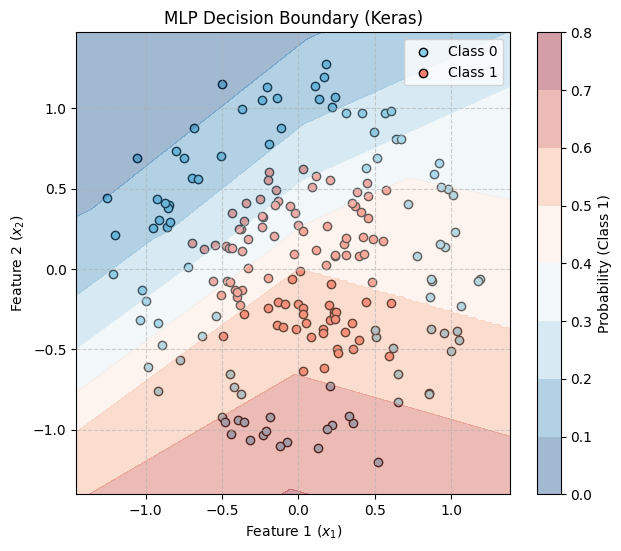

In [5]:
plot_decision_boundary(X, y, model)

## 学習

In [6]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy']
)

history = model.fit(X, y, epochs=200, verbose=0)

## 評価と学習後の決定境界の可視化

In [7]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"最終的な損失 (Loss): {loss:.4f}")
print(f"最終的な正解率 (Accuracy): {accuracy:.4f}")

最終的な損失 (Loss): 0.0727
最終的な正解率 (Accuracy): 0.9550


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


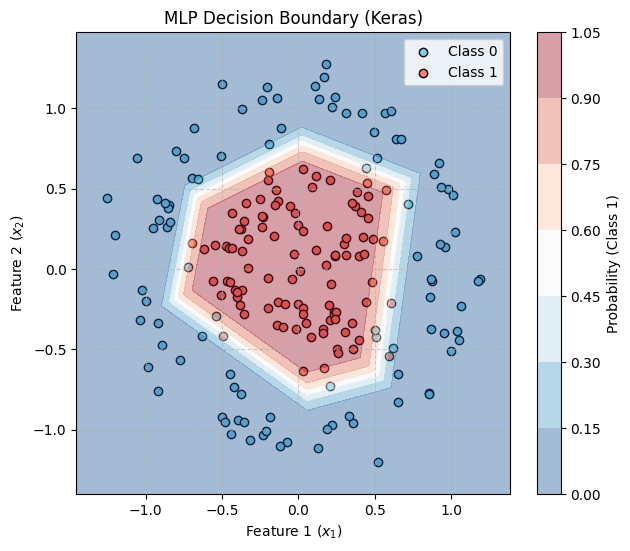

In [8]:
plot_decision_boundary(X, y, model)